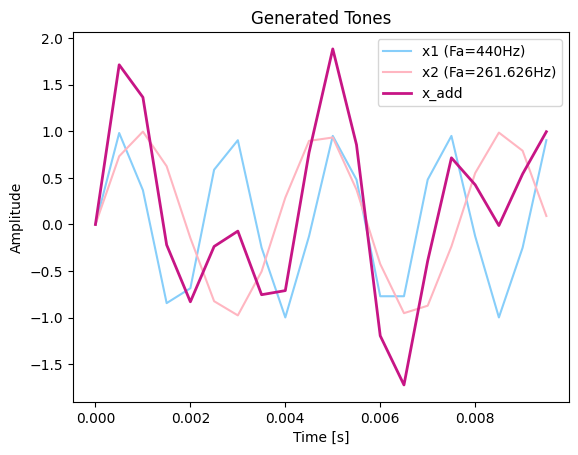

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# パラメータ設定
Fs = 2000  # サンプリング周波数
N = Fs  # サンプリング点数（1秒間）
t = np.arange(N) / Fs  # 時間軸

# 単音生成
Fa1 = 440  # 周波数（ラ）
x1 = np.sin(2 * np.pi * Fa1 * t)

Fa2 = 261.626  # 周波数（ド）
x2 = np.sin(2 * np.pi * Fa2 * t)

# 和音生成
x_add = x1 + x2

# プロット
plt.plot(t[:20], x1[:20], label='x1 (Fa=440Hz)', color='lightskyblue')
plt.plot(t[:20], x2[:20], label='x2 (Fa=261.626Hz)', color='lightpink')
plt.plot(t[:20], x_add[:20], label='x_add', linewidth=2, color='mediumvioletred')
plt.legend()
plt.title('Generated Tones')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# 音声ファイルの保存
write('tone.wav', Fs, x_add.astype(np.float32))


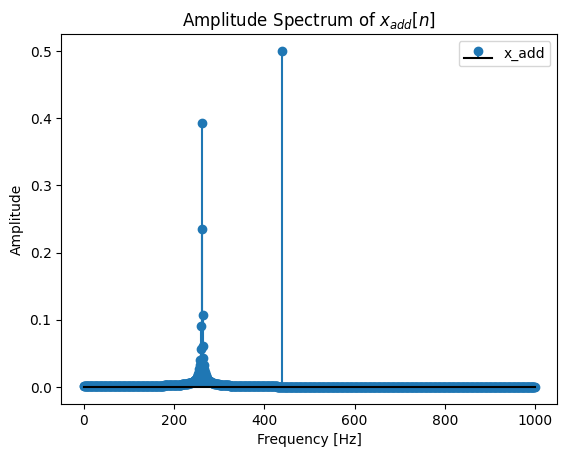

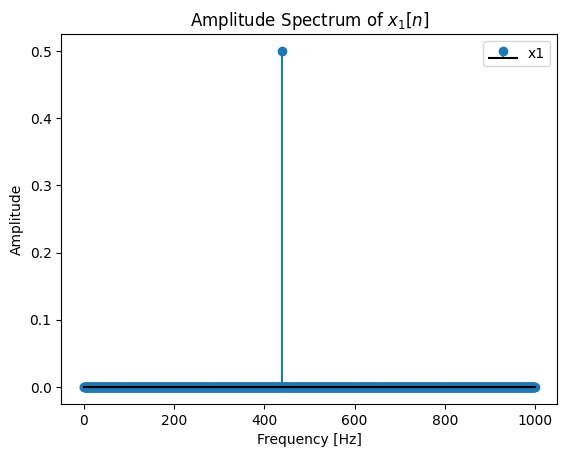

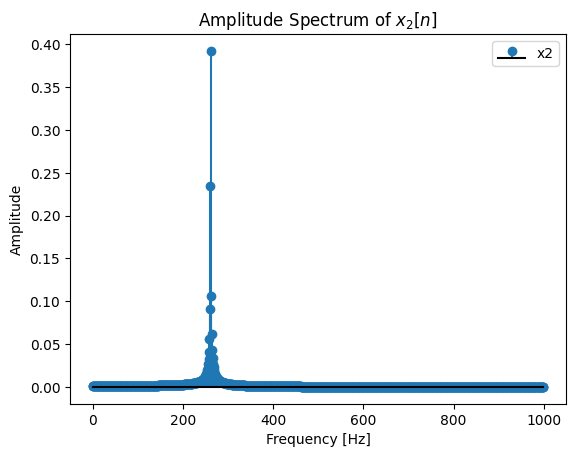

In [3]:
from scipy.fft import fft

# FFT
X1 = fft(x1)
X2 = fft(x2)
X_add = fft(x_add)

# 振幅スペクトルの計算
amp_X1 = np.abs(X1) / N
amp_X2 = np.abs(X2) / N
amp_X_add = np.abs(X_add) / N

# 周波数軸
f = np.fft.fftfreq(N, 1/Fs)

# プロット
plt.figure()
plt.stem(f[:N//2], amp_X_add[:N//2], label='x_add', basefmt="k-")
plt.legend()
plt.title('Amplitude Spectrum of $x_{add}[n]$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.stem(f[:N//2], amp_X1[:N//2], label='x1', basefmt="k-")
plt.legend()
plt.title('Amplitude Spectrum of $x_{1}[n]$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.stem(f[:N//2], amp_X2[:N//2], label='x2', basefmt="k-")
plt.legend()
plt.title('Amplitude Spectrum of $x_{2}[n]$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()


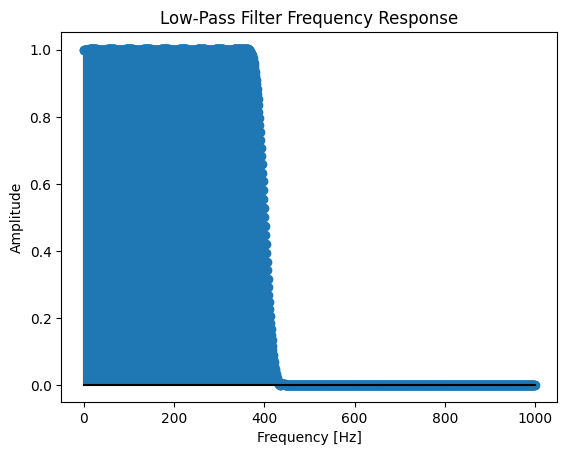

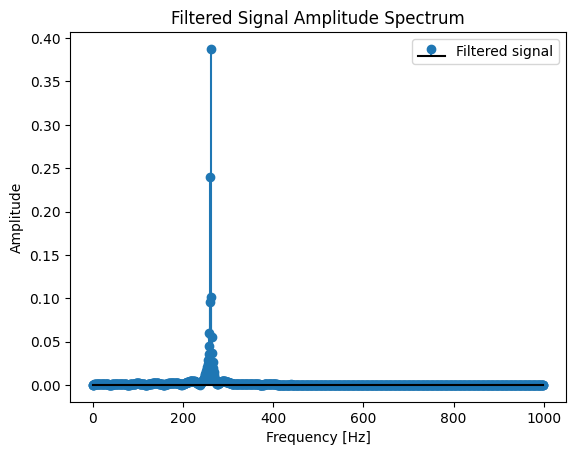

In [4]:
from scipy.signal import firwin, lfilter

# ローパスフィルタ設計
cutoff = 400 / (Fs / 2)  # 正規化周波数
numtaps = 101  # フィルタ係数数
h_lpf = firwin(numtaps, cutoff)

# フィルタの周波数特性
H_lpf = fft(h_lpf, N)

# プロット
plt.figure()
plt.stem(f[:N//2], np.abs(H_lpf[:N//2]), basefmt="k-")
plt.title('Low-Pass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

# フィルタ適用
y = lfilter(h_lpf, 1.0, x_add)

# FFT
Y = fft(y)

# 振幅スペクトルの計算
amp_Y = np.abs(Y) / N

# プロット
plt.figure()
plt.stem(f[:N//2], amp_Y[:N//2], label='Filtered signal', basefmt="k-")
plt.legend()
plt.title('Filtered Signal Amplitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

# フィルタ後の音声ファイルの保存
write('filtered_tone.wav', Fs, y.astype(np.float32))


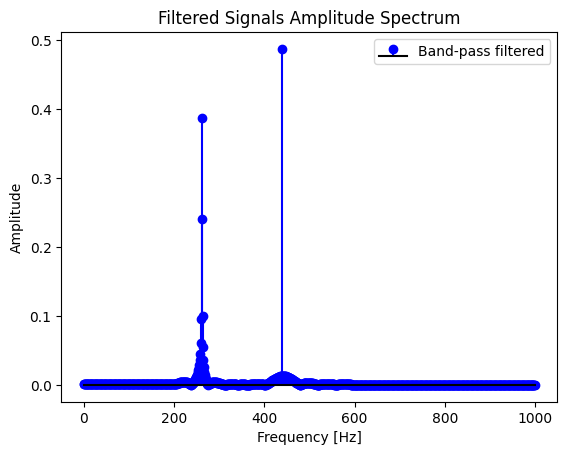

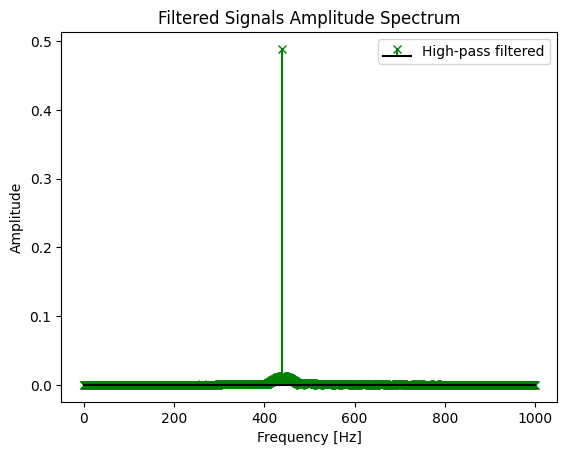

In [9]:
# バンドパスフィルタ設計
lowcut = 200 / (Fs / 2)
highcut = 600 / (Fs / 2)
h_bpf = firwin(numtaps, [lowcut, highcut], pass_zero=False)

# ハイパスフィルタ設計
highcut = 400 / (Fs / 2)
h_hpf = firwin(numtaps, highcut, pass_zero=False)

# フィルタ適用
y_bpf = lfilter(h_bpf, 1.0, x_add)
y_hpf = lfilter(h_hpf, 1.0, x_add)

# FFT
Y_bpf = fft(y_bpf)
Y_hpf = fft(y_hpf)

# 振幅スペクトルの計算
amp_Y_bpf = np.abs(Y_bpf) / N
amp_Y_hpf = np.abs(Y_hpf) / N

# プロット
plt.figure()
plt.stem(f[:N//2], amp_Y_bpf[:N//2], label='Band-pass filtered', basefmt="k-", linefmt="b-")
plt.legend()
plt.title('Filtered Signals Amplitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

# プロット
plt.figure()
plt.stem(f[:N//2], amp_Y_hpf[:N//2], label='High-pass filtered', basefmt="k-", linefmt="g-", markerfmt="gx")
plt.legend()
plt.title('Filtered Signals Amplitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

# 音声ファイルの保存
write('bandpass_filtered_tone.wav', Fs, y_bpf.astype(np.float32))
write('highpass_filtered_tone.wav', Fs, y_hpf.astype(np.float32))
